In [62]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [63]:
ethusd = pd.read_csv('BitFinex/Bitfinex_ETHUSD_d.csv', skiprows=1)

<AxesSubplot:>

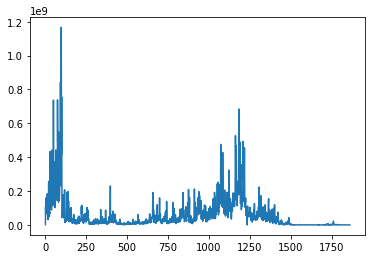

In [26]:
ethusd['Volume USD'].plot()

<AxesSubplot:>

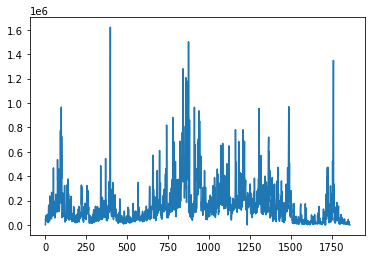

In [11]:
ethusd['Volume ETH'].plot()

<AxesSubplot:>

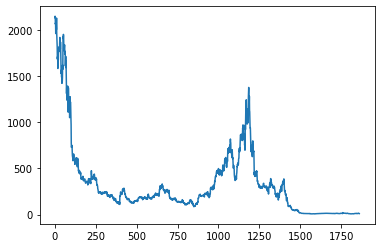

In [6]:
ethusd.open.plot()

In [10]:
ethusd.head()

,unix,date,symbol,open,high,low,close,Volume USD,Volume ETH,datetime
0,1618272000000,2021-04-13 00:00:00,ETH/USD,2138.2,2158.544939,2137.1,2153.7,1.573278e+06,730.500275,1970-01-01 00:26:58.272000
1,1618185600000,2021-04-12 00:00:00,ETH/USD,2152.9,2203.900000,2101.9,2138.2,1.074953e+08,50273.744234,1970-01-01 00:26:58.185600
2,1618099200000,2021-04-11 00:00:00,ETH/USD,2136.7,2166.900000,2115.6,2152.8,7.389330e+07,34324.276259,1970-01-01 00:26:58.099200
3,1618012800000,2021-04-10 00:00:00,ETH/USD,2067.4,2200.000000,2059.1,2136.1,1.592456e+08,74549.703470,1970-01-01 00:26:58.012800
4,1617926400000,2021-04-09 00:00:00,ETH/USD,2081.3,2100.600000,2051.8,2067.4,1.380132e+08,66756.893352,1970-01-01 00:26:57.926400


<AxesSubplot:>

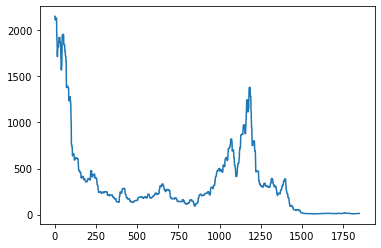

In [121]:
ethusd.close_7_days.plot()

In [8]:
ethusd.describe()

,unix,open,high,low,close,Volume USD,Volume ETH
count,1.862000e+03,1862.000000,1862.000000,1862.000000,1862.000000,1.862000e+03,1.862000e+03
mean,2.334222e+11,323.379708,336.607715,308.551599,324.529508,5.627969e+07,1.553950e+05
std,5.644766e+11,387.661168,404.061376,369.239435,389.904088,9.298156e+07,1.676727e+05
min,1.457482e+09,6.682000,7.324000,5.861000,6.702000,0.000000e+00,0.000000e+00
25%,1.497679e+09,110.855000,118.635000,106.300000,111.262500,5.721198e+06,4.901459e+04
50%,1.537877e+09,211.035000,217.995000,203.265000,211.075000,2.424689e+07,1.088843e+05
75%,1.578074e+09,382.874044,393.927500,367.967500,383.237500,6.522457e+07,1.947546e+05
max,1.618272e+12,2152.900000,2203.900000,2137.100000,2153.700000,1.167773e+09,1.620940e+06


In [27]:
ethusd['datetime'] = pd.to_datetime(ethusd['unix'])

In [125]:
ethusd['open_14_days'] = ethusd['open'][::-1].rolling(window=14).mean()
ethusd['close_7_days_mean'] = ethusd['close'][::-1].rolling(window=7).mean()
ethusd['close_14_days_mean'] = ethusd['close'][::-1].rolling(window=14).mean()
ethusd['close_7_days'] = ethusd['close'][::-1].rolling(window=7).max()

<AxesSubplot:>

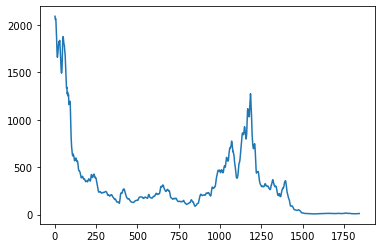

In [124]:
ethusd['close_7_days_mean'].plot()

<AxesSubplot:>

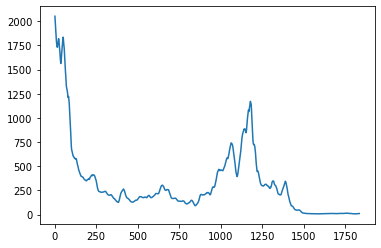

In [126]:
ethusd['close_14_days_mean'].plot()

<AxesSubplot:>

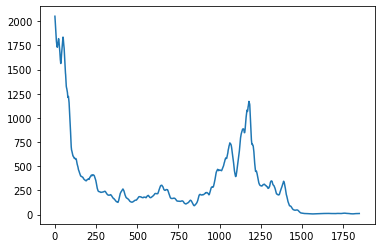

In [22]:
ethusd['open_14_days'].plot()

In [23]:
ethusd.head()

,unix,date,symbol,open,high,low,close,Volume USD,Volume ETH,datetime,open_14_days,close_7_days
0,1618272000000,2021-04-13 00:00:00,ETH/USD,2138.2,2158.544939,2137.1,2153.7,1.573278e+06,730.500275,1970-01-01 00:26:58.272000,2050.771429,2153.7
1,1618185600000,2021-04-12 00:00:00,ETH/USD,2152.9,2203.900000,2101.9,2138.2,1.074953e+08,50273.744234,1970-01-01 00:26:58.185600,2027.914286,2152.8
2,1618099200000,2021-04-11 00:00:00,ETH/USD,2136.7,2166.900000,2115.6,2152.8,7.389330e+07,34324.276259,1970-01-01 00:26:58.099200,1994.650000,2152.8
3,1618012800000,2021-04-10 00:00:00,ETH/USD,2067.4,2200.000000,2059.1,2136.1,1.592456e+08,74549.703470,1970-01-01 00:26:58.012800,1964.442857,2136.1
4,1617926400000,2021-04-09 00:00:00,ETH/USD,2081.3,2100.600000,2051.8,2067.4,1.380132e+08,66756.893352,1970-01-01 00:26:57.926400,1938.092857,2112.1


In [65]:
for day in range(1, 8):
    ethusd[f'close_day_{day}'] = ethusd['close'][::-1].shift(day+1)

In [66]:
ethusd['dt'] = pd.to_datetime(ethusd['date'])

In [67]:
ethusd['weekday'] = ethusd['dt'].dt.weekday
ethusd['month'] = ethusd['dt'].dt.month
ethusd['year'] = ethusd['dt'].dt.year

In [68]:
ethusd['target'] = ethusd['close'].shift(1)

In [34]:
ethusd[['date', 'close', 'target']].head()

,date,close,target
0,2021-04-13 00:00:00,2153.7,NaN
1,2021-04-12 00:00:00,2138.2,2153.7
2,2021-04-11 00:00:00,2152.8,2138.2
3,2021-04-10 00:00:00,2136.1,2152.8
4,2021-04-09 00:00:00,2067.4,2136.1


In [69]:
ethusd = pd.get_dummies(ethusd, columns=['weekday', 'month', 'year'])
ethusd.drop('date', axis=1, inplace=True)
ethusd.drop('unix', axis=1, inplace=True)
ethusd.drop('symbol', axis=1, inplace=True)
ethusd.dropna(inplace=True)

In [101]:
ethusd.drop('dt', axis=1, inplace=True)

In [102]:
y = ethusd.target
X = ethusd.drop('target', axis=1)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [105]:
from sklearn.metrics import max_error, mean_absolute_error, r2_score

In [106]:
from sklearn.linear_model import LinearRegression

In [109]:
model = LinearRegression().fit(X_train, y_train)

In [110]:
y_pred = model.predict(X_test)

In [111]:
print("Max Error =", max_error(y_test, y_pred))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

Max Error = 263.28095450288265
MAE = 13.680484775679021
R2 = 0.9935257021005225


In [112]:
model = LinearRegression(positive=True)
model.fit(X_train, y_train) #  Обучение
y_pred = model.predict(X_test) #  Экзамен
print("Max Error =", max_error(y_test, y_pred))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

Max Error = 213.99964152961365
MAE = 13.386695204671467
R2 = 0.9938776558681411


In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
model = RandomForestRegressor(max_depth=10,random_state=42)
model.fit(X_train, y_train) #  Обучение
y_pred = model.predict(X_test) #  Экзамен
print("Max Error =", max_error(y_test, y_pred))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

Max Error = 241.26164102920075
MAE = 14.307407123395054
R2 = 0.9924542618909302


In [115]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=42)

params = {
    "n_estimators": [50, 100, 500],
    "max_depth": [3, 10],
    "min_samples_split": [2, 4]
}
gs = GridSearchCV(model, params, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 10], 'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             scoring='neg_mean_squared_error')

In [116]:
gs.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}

In [117]:
gs.best_score_

-1051.9270824139073

In [118]:
best_model = gs.best_estimator_

In [119]:
import pickle 

f = open("rfr.model", "wb") # Открываем файл
pickle.dump(best_model, f)  # Записываем обученную модель в файл

In [120]:
my_model_file = open("rfr.model", "rb")
my_model = pickle.load(my_model_file)
my_model

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)